## Import Modules

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

## Loading the dataset

In [106]:
df = pd.read_csv("project_mach.csv")
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,11/23/2023,6/24/2025,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,9/21/2023,6/4/2025,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,6/27/2023,4/27/2025,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,8/24/2023,11/5/2025,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,5/25/2023,9/14/2025,Third,16446,6,2,16.977483,Good,Good,Weak,1


In [108]:

df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


In [110]:

df.isnull().sum()

Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64

In [112]:

maintenance_needed_count = df['Need_Maintenance'].sum()

df['Transmission_Type'] = df['Transmission_Type'].astype(str)

manual_cars_count = (df['Owner_Type'] == 'Second').sum()

print(f"Number of Manual transmissions: {manual_cars_count}")

print(f"Number of items that need maintenance: {maintenance_needed_count}")

Number of Manual transmissions: 16875
Number of items that need maintenance: 40498


In [114]:
df.head(2)

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,11/23/2023,6/24/2025,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,9/21/2023,6/4/2025,Second,23489,7,0,13.625307,New,New,Weak,1


In [116]:

categorical_cols = ['Vehicle_Model', 'Maintenance_History', 'Reported_Issues', 'Vehicle_Age', 'Fuel_Type', 
                    'Transmission_Type', 'Engine_Size', 'Owner_Type', 'Service_History', 'Accident_History',
                   'Tire_Condition', 'Brake_Condition', 'Battery_Status', 'Need_Maintenance']
numerical_cols = ['Mileage', 'Odometer_Reading', 'Insurance_Premium', 'Fuel_Efficiency']

date_cols = ['Last_Service_Date', 'Warranty_Expiry_Date']

In [118]:
print('Number of Categorical Columns:', len(categorical_cols))
print('Number of Numerical Columns:', len(numerical_cols))
print('Number of DateTime Columns:', len(date_cols))

Number of Categorical Columns: 14
Number of Numerical Columns: 4
Number of DateTime Columns: 2


In [120]:

for col in date_cols:
    if df[col].dtype == 'object': 
        df[col] = pd.to_datetime(df[col])

C:\Users\2101034917\AppData\Local\Temp\ipykernel_19300\1771447135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
C:\Users\2101034917\AppData\Local\Temp\ipykernel_19300\1771447135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
C:\Users\2101034917\AppData\Local\Temp\ipykernel_19300\1771447135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().

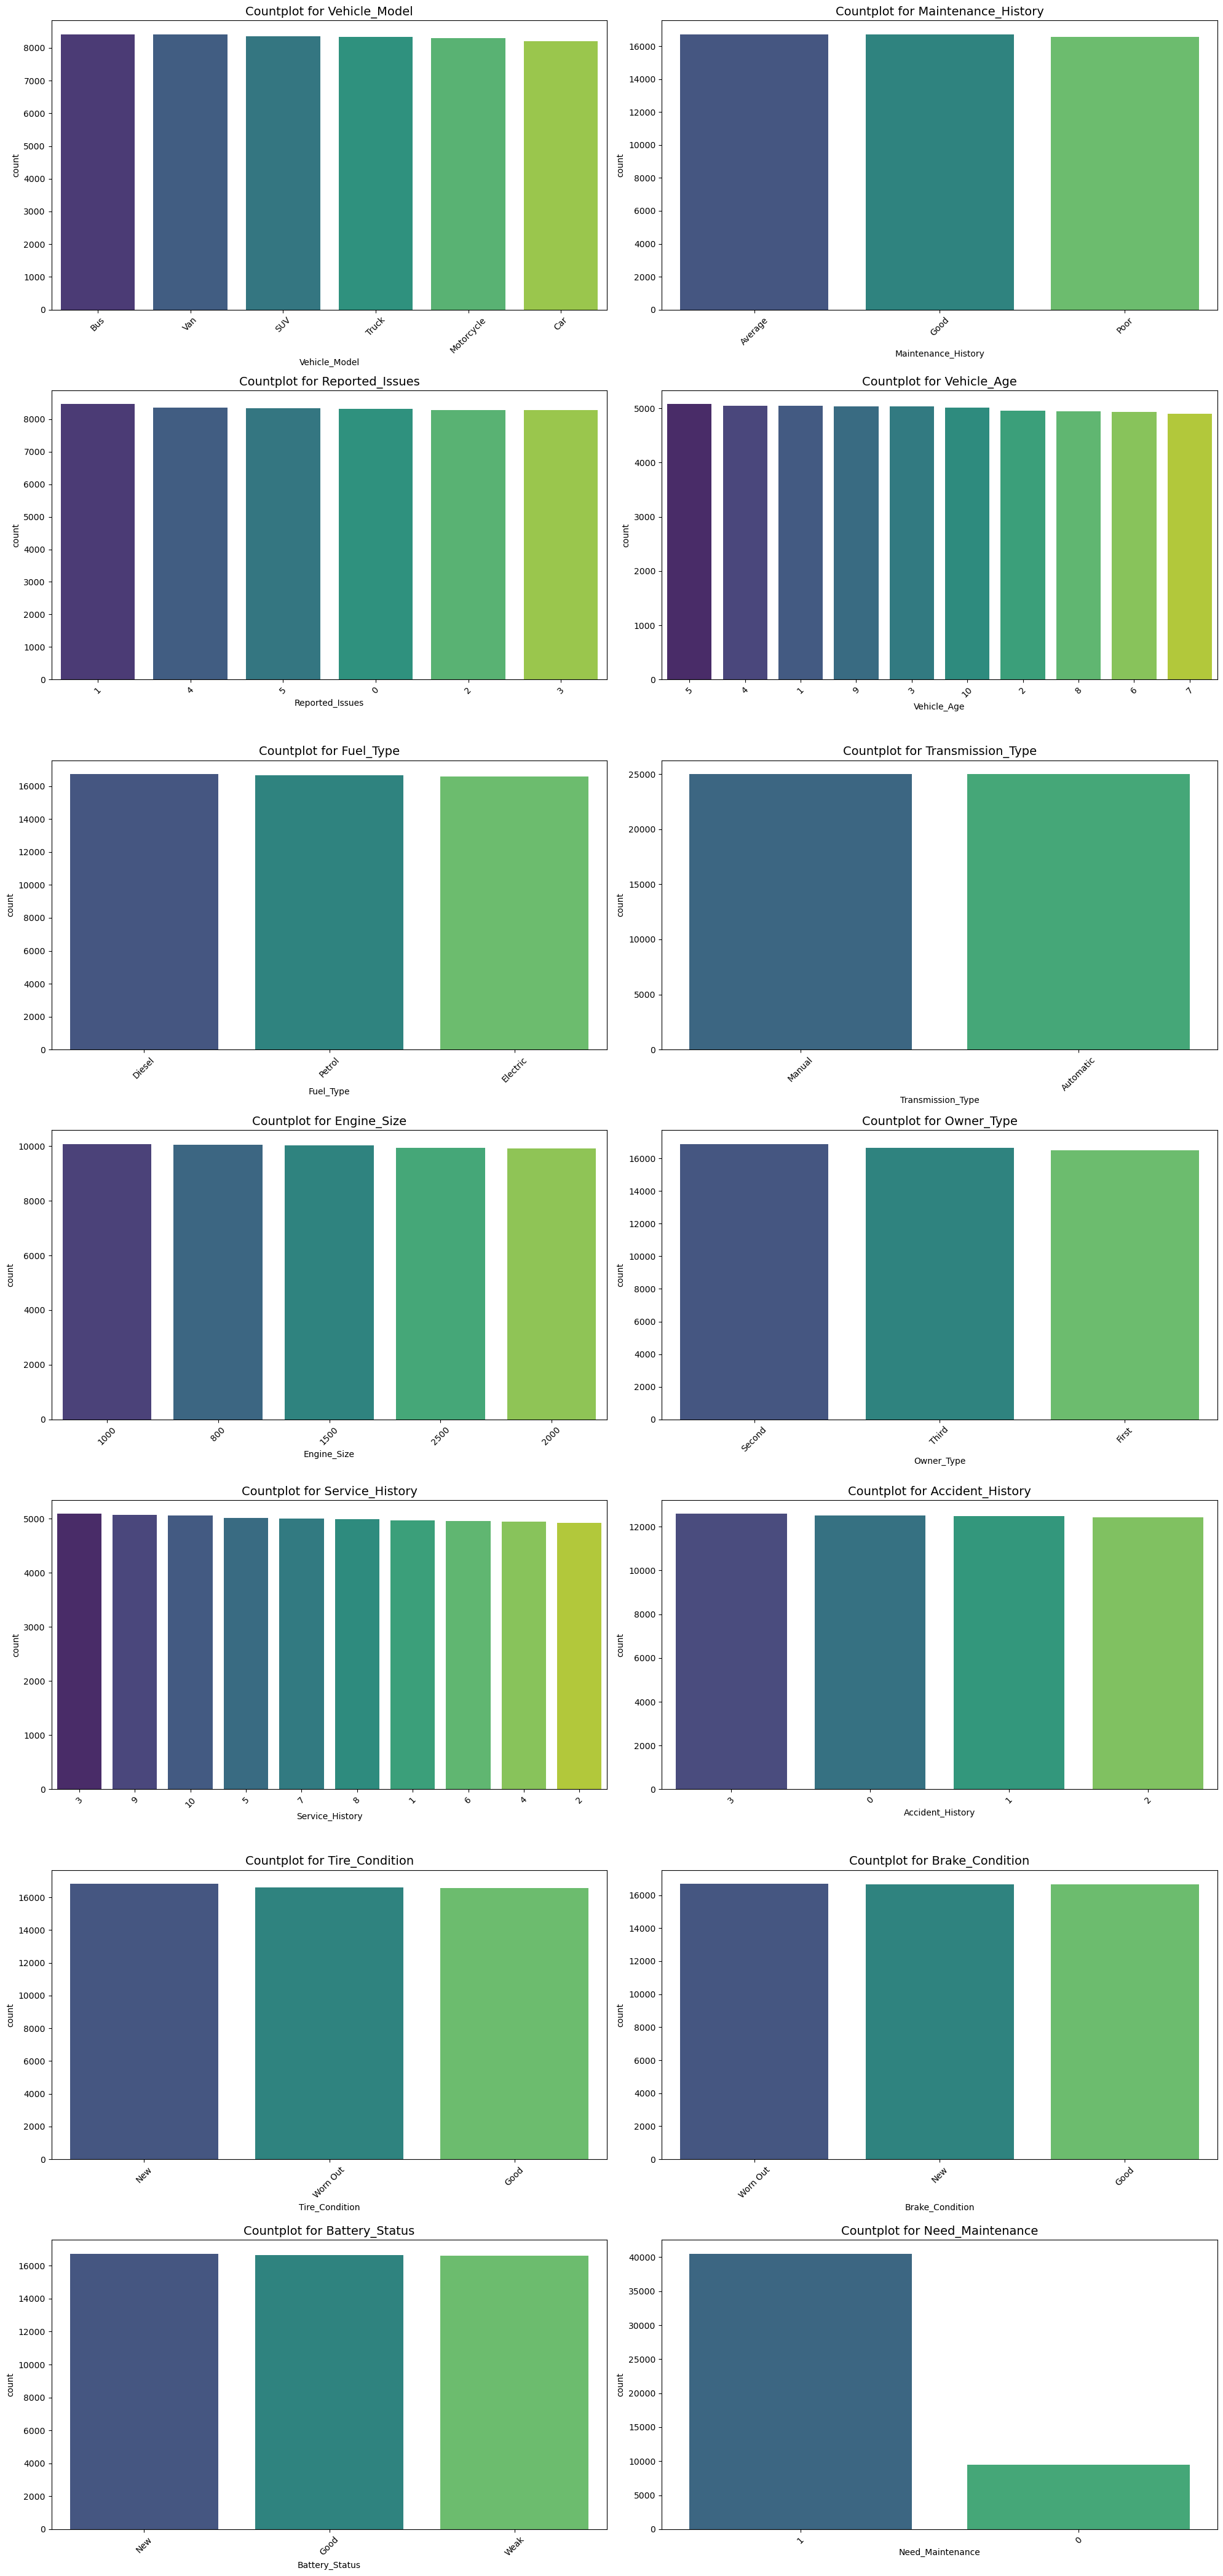

In [122]:
plt.figure(figsize=(20, len(categorical_cols) * 3))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot((len(categorical_cols) + 1) // 2, 2, i)  # Two columns layout
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Countplot for {col}", fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


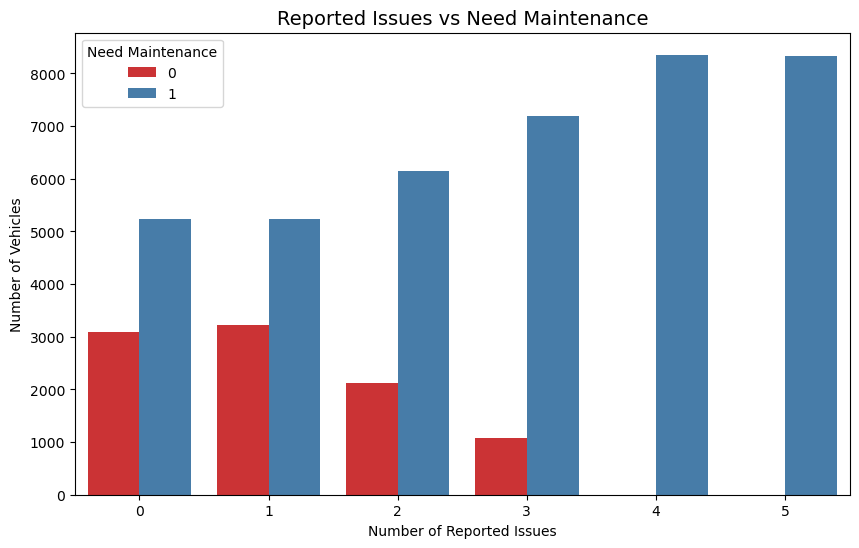

In [124]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Reported_Issues", hue="Need_Maintenance", palette="Set1")
plt.title("Reported Issues vs Need Maintenance", fontsize=14)
plt.ylabel("Number of Vehicles")
plt.xlabel("Number of Reported Issues")
plt.legend(title="Need Maintenance")


C:\Users\2101034917\AppData\Local\Temp\ipykernel_19300\2239793334.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Service_History", y="Need_Maintenance", marker='o', ci=None, color="purple")


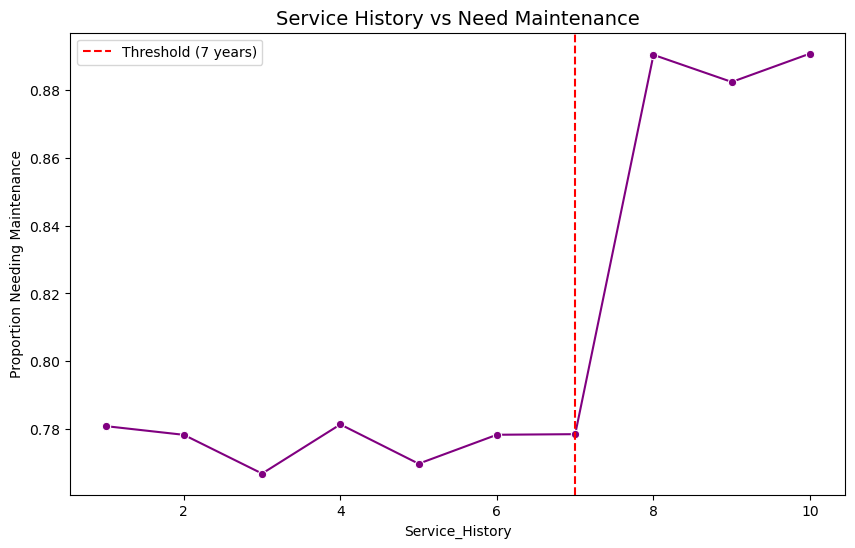

In [131]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Service_History", y="Need_Maintenance", marker='o', ci=None, color="purple")
plt.axvline(x=7, color="red", linestyle="--", label="Threshold (7 years)")
plt.title("Service History vs Need Maintenance", fontsize=14)
plt.ylabel("Proportion Needing Maintenance")
plt.legend()
plt.show()

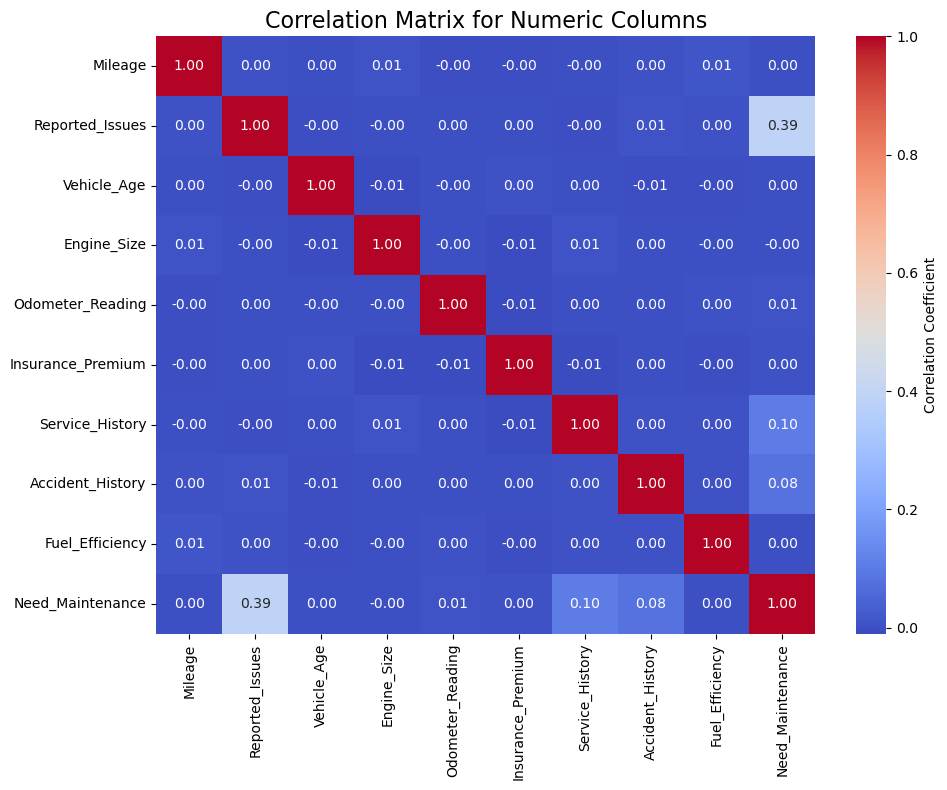

In [133]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix for Numeric Columns", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [135]:
df.head(2)

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1


In [137]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le  


In [139]:
df = df.drop(columns=date_cols)

In [141]:
for col in ['Mileage', 'Odometer_Reading', 'Insurance_Premium']:
    df[col] = np.log(df[col]+1)

In [143]:
X = df.iloc[:40000].drop(columns=['Need_Maintenance']) 
y = df.iloc[:40000]['Need_Maintenance']
x_validate=df.iloc[40000:50000].drop(columns=['Need_Maintenance'])
y_validate = df.iloc[40000:500000]['Need_Maintenance']

In [145]:
print("Length of X:", len(X))
print("Length of y:", len(y))

Length of X: 40000
Length of y: 40000


In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [149]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_LI = LinearRegression()

model_LI.fit(x_train, y_train)

y_pred_LI = model_LI.predict(x_validate)

r2 = r2_score(y_validate, y_pred_LI)

mse = mean_squared_error(y_validate, y_pred_LI)

print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² Score: 0.3442
Mean Squared Error: 0.1008


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_LO = LogisticRegression()
model_LO.fit(x_train, y_train)

y_pred_LO = model_LO.predict(x_validate)

report = classification_report(y_validate, y_pred_LO, target_names=["No Maintenance Needed", "Maintenance Needed"])
print("Classification Report:")
print(report)

Classification Report:
                       precision    recall  f1-score   support

No Maintenance Needed       0.73      0.59      0.65      1898
   Maintenance Needed       0.91      0.95      0.93      8102

             accuracy                           0.88     10000
            macro avg       0.82      0.77      0.79     10000
         weighted avg       0.87      0.88      0.88     10000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_RF = RandomForestClassifier(n_estimators=100,random_state=25)
model_RF.fit(x_train, y_train)

y_pred_RF = model_RF.predict(x_validate)

accuracy = accuracy_score(y_validate, y_pred_RF)
print(f'Accuracy: {accuracy:.4f}')

from sklearn.metrics import r2_score

r2 = r2_score(y_validate, y_pred_RF)

print(f'R² Score: {r2:.4f}')

print("\nClassification Report:")
print(classification_report(y_validate, y_pred_RF))


report = classification_report(y_validate, y_pred_RF, target_names=["No Maintenance Needed", "Maintenance Needed"])
print("Classification Report:")
print(report)

Accuracy: 1.0000
R² Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1898
           1       1.00      1.00      1.00      8102

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Classification Report:
                       precision    recall  f1-score   support

No Maintenance Needed       1.00      1.00      1.00      1898
   Maintenance Needed       1.00      1.00      1.00      8102

             accuracy                           1.00     10000
            macro avg       1.00      1.00      1.00     10000
         weighted avg       1.00      1.00      1.00     10000



In [154]:
print("Length of X:", len(x_validate))
print("Length of y:", len(y_validate))

Length of X: 10000
Length of y: 10000


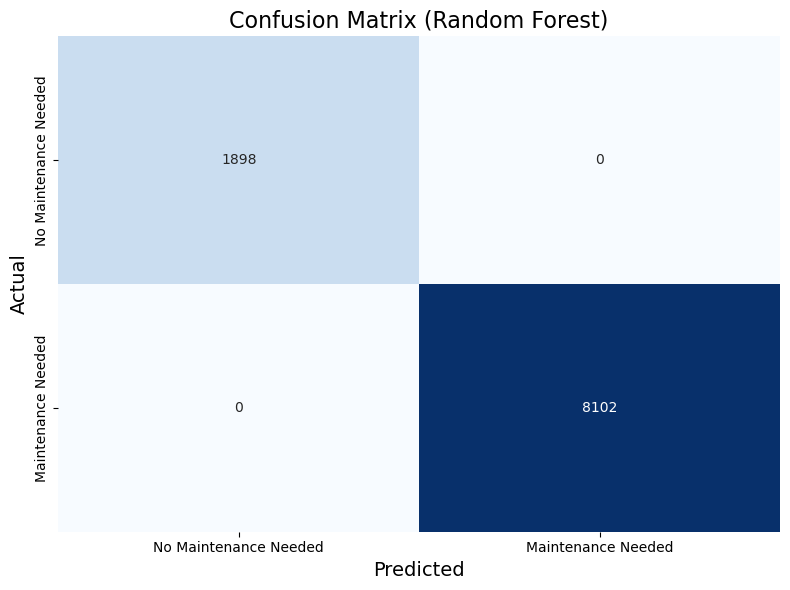

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validate, y_pred_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["No Maintenance Needed", "Maintenance Needed"], 
            yticklabels=["No Maintenance Needed", "Maintenance Needed"])
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix (Random Forest)", fontsize=16)
plt.tight_layout()
plt.show()

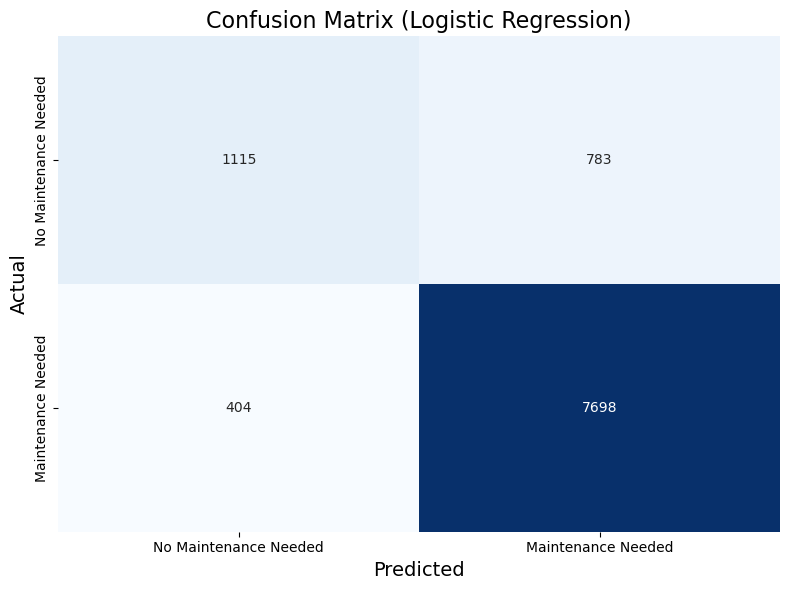

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validate, y_pred_LO)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["No Maintenance Needed", "Maintenance Needed"], 
            yticklabels=["No Maintenance Needed", "Maintenance Needed"])
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix (Logistic Regression)", fontsize=16)
plt.tight_layout()
plt.show()